### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Agregar columna para identificar la tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

In [ ]:
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
# Facturación total
facturacion_total = df["Precio"].sum()
print(" Facturación total:", facturacion_total)

 Facturación total: 4403619200.0


In [ ]:
facturacion_tiendas = df.groupby("Tienda")["Precio"].sum().reset_index()
print("\n Facturación por tienda:")
print(facturacion_tiendas)


 Facturación por tienda:
     Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


In [ ]:
# Aplicar formato con separador de miles
facturacion_tiendas["Precio"] = facturacion_tiendas["Precio"].apply(lambda x: "${:,.0f}".format(x))
facturacion_tiendas.columns = ["Tienda", "Facturación Total"]
print(" Facturación por tienda (formato amigable):")
print(facturacion_tiendas)


 Facturación por tienda (formato amigable):
     Tienda Facturación Total
0  Tienda 1    $1,150,880,400
1  Tienda 2    $1,116,343,500
2  Tienda 3    $1,098,019,600
3  Tienda 4    $1,038,375,700


<ipython-input-11-d3766a20a011>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby("Tienda")["Precio"].sum().reset_index(), x="Tienda", y="Precio", palette="viridis")


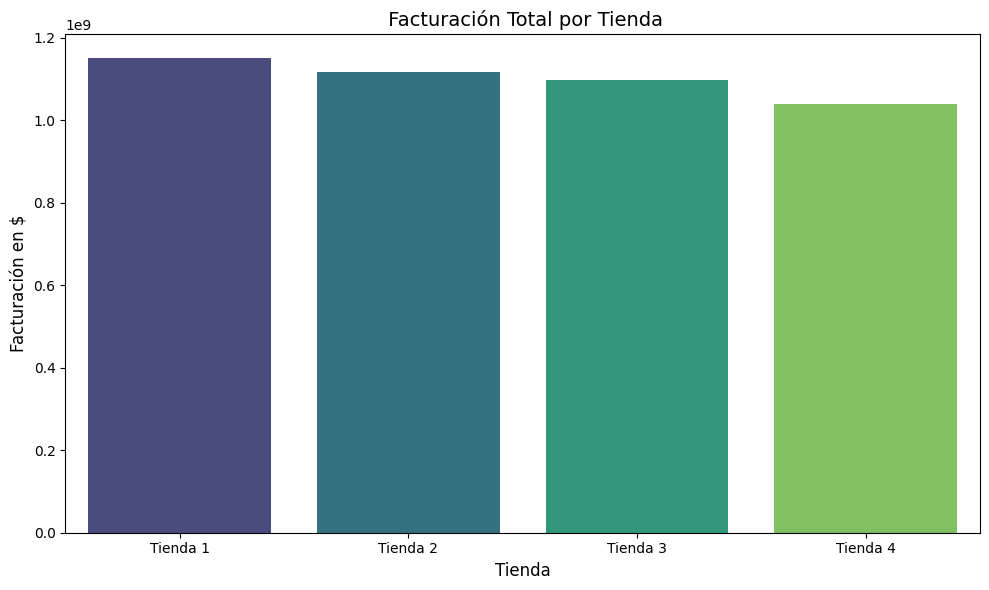

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby("Tienda")["Precio"].sum().reset_index(), x="Tienda", y="Precio", palette="viridis")
plt.title(" Facturación Total por Tienda", fontsize=14)
plt.ylabel("Facturación en $", fontsize=12)
plt.xlabel("Tienda", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
ventas_categoria = df["Categoría del Producto"].value_counts().reset_index()
ventas_categoria.columns = ["Categoría", "Cantidad de Ventas"]

print("Ventas por categoría:")
print(ventas_categoria)

Ventas por categoría:
                 Categoría  Cantidad de Ventas
0                  Muebles                1886
1             Electrónicos                1772
2                 Juguetes                1290
3        Electrodomésticos                1149
4     Deportes y diversión                1113
5   Instrumentos musicales                 753
6                   Libros                 742
7  Artículos para el hogar                 730


In [ ]:
ventas_categoria = ventas_categoria.sort_values(by="Cantidad de Ventas", ascending=False)
ventas_categoria

,Categoría,Cantidad de Ventas
0,Muebles,1886
1,Electrónicos,1772
2,Juguetes,1290
3,Electrodomésticos,1149
4,Deportes y diversión,1113
5,Instrumentos musicales,753
6,Libros,742
7,Artículos para el hogar,730


<ipython-input-14-28f70a74f555>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_categoria, x="Cantidad de Ventas", y="Categoría", palette="mako")


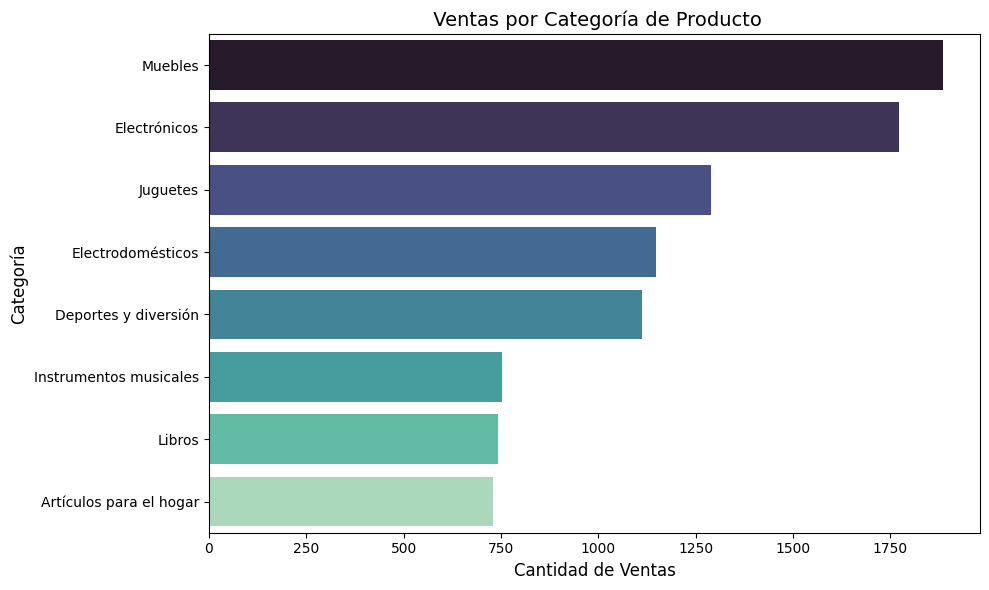

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=ventas_categoria, x="Cantidad de Ventas", y="Categoría", palette="mako")
plt.title(" Ventas por Categoría de Producto", fontsize=14)
plt.xlabel("Cantidad de Ventas", fontsize=12)
plt.ylabel("Categoría", fontsize=12)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = df.groupby("Tienda")["Calificación"].mean().reset_index()
calificacion_promedio.columns = ["Tienda", "Calificación Promedio"]
calificacion_promedio["Calificación Promedio"] = calificacion_promedio["Calificación Promedio"].round(2)

print("Calificación promedio por tienda:")
print(calificacion_promedio)



Calificación promedio por tienda:
     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


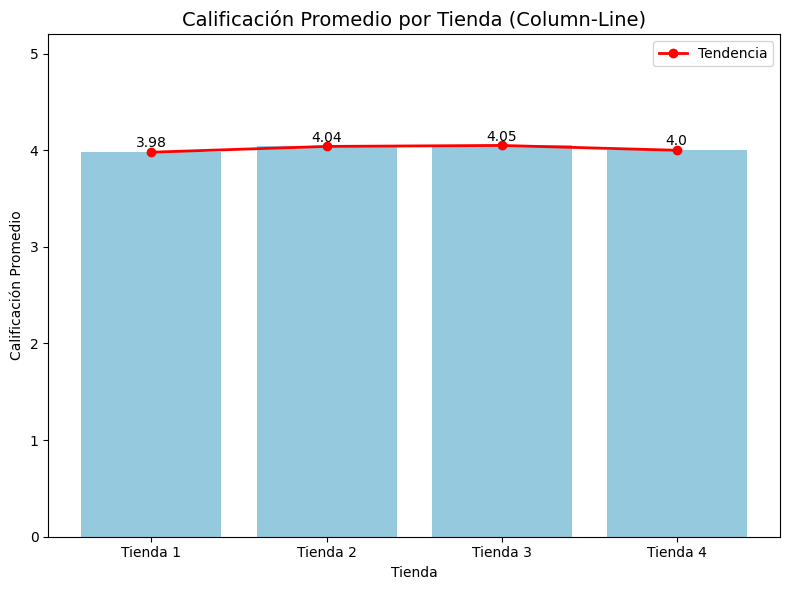

In [ ]:
# Gráfico combinando barras y línea
plt.figure(figsize=(8,6))

# Barras (columnas)
sns.barplot(data=calificacion_promedio, x="Tienda", y="Calificación Promedio", color='skyblue')

# Línea sobre las barras
plt.plot(calificacion_promedio["Tienda"], calificacion_promedio["Calificación Promedio"],
         marker='o', color='red', linewidth=2, label="Tendencia")

# Etiquetas encima de cada barra
for i, row in calificacion_promedio.iterrows():
    plt.text(i, row["Calificación Promedio"] + 0.05, f"{row['Calificación Promedio']}",
             ha='center', fontsize=10, color='black')

plt.title("Calificación Promedio por Tienda (Column-Line)", fontsize=14)
plt.ylim(0, 5.2)
plt.ylabel("Calificación Promedio")
plt.xlabel("Tienda")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
productos_por_tienda = df.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad de Ventas")


In [ ]:
#Mas vendido
mas_vendidos = productos_por_tienda.sort_values("Cantidad de Ventas", ascending=False).groupby("Tienda").first().reset_index()
mas_vendidos.columns = ["Tienda", "Producto Más Vendido", "Cantidad de Ventas"]

print("Productos más vendidos por tienda:")
print(mas_vendidos)

Productos más vendidos por tienda:
     Tienda       Producto Más Vendido  Cantidad de Ventas
0  Tienda 1              TV LED UHD 4K                  60
1  Tienda 2  Iniciando en programación                  65
2  Tienda 3              Kit de bancas                  57
3  Tienda 4                   Cama box                  62


In [ ]:
#Menos vendido
menos_vendidos = productos_por_tienda.sort_values("Cantidad de Ventas", ascending=True).groupby("Tienda").first().reset_index()
menos_vendidos.columns = ["Tienda", "Producto Menos Vendido", "Cantidad de Ventas"]

print("\nProductos menos vendidos por tienda:")
print(menos_vendidos)



Productos menos vendidos por tienda:
     Tienda     Producto Menos Vendido  Cantidad de Ventas
0  Tienda 1  Auriculares con micrófono                  33
1  Tienda 2              Juego de mesa                  32
2  Tienda 3    Bloques de construcción                  35
3  Tienda 4         Guitarra eléctrica                  33


<ipython-input-20-33bc65dd043c>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_por_tienda = productos_por_tienda.groupby("Tienda").apply(lambda x: x.nlargest(5, "Cantidad de Ventas")).reset_index(drop=True)


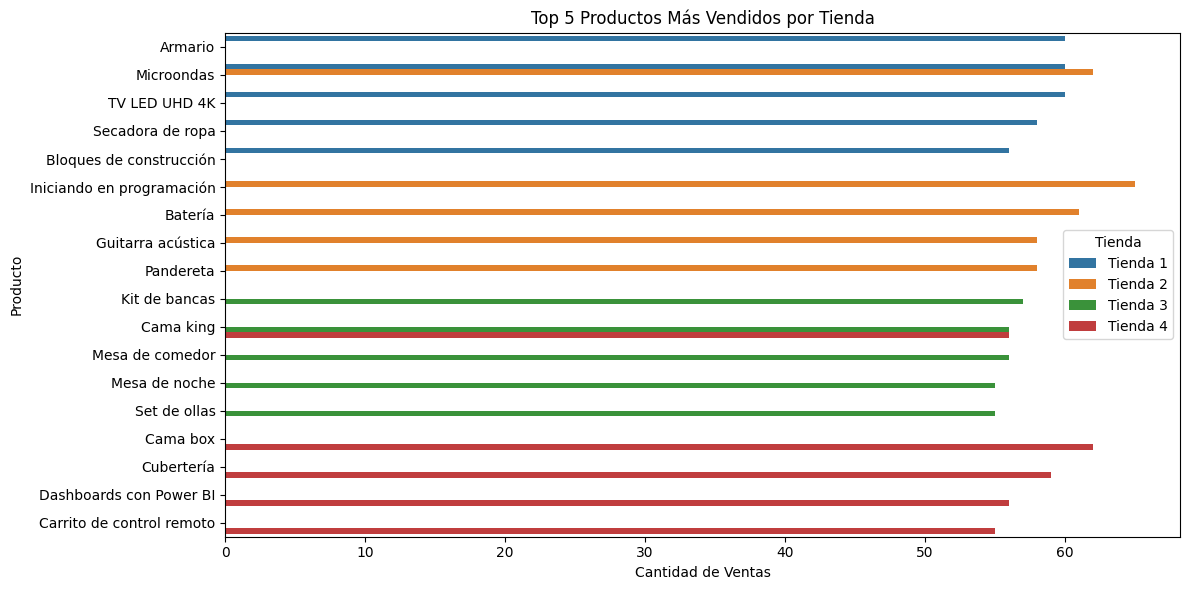

In [ ]:
#Mas vendido por tienda
plt.figure(figsize=(12, 6))
top5_por_tienda = productos_por_tienda.groupby("Tienda").apply(lambda x: x.nlargest(5, "Cantidad de Ventas")).reset_index(drop=True)

sns.barplot(data=top5_por_tienda, x="Cantidad de Ventas", y="Producto", hue="Tienda", dodge=True)
plt.title("Top 5 Productos Más Vendidos por Tienda")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()
envio_promedio.columns = ["Tienda", "Envío Promedio"]
envio_promedio["Envío Promedio"] = envio_promedio["Envío Promedio"].round(2)

print("Costo de envío promedio por tienda:")
print(envio_promedio)


Costo de envío promedio por tienda:
     Tienda  Envío Promedio
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


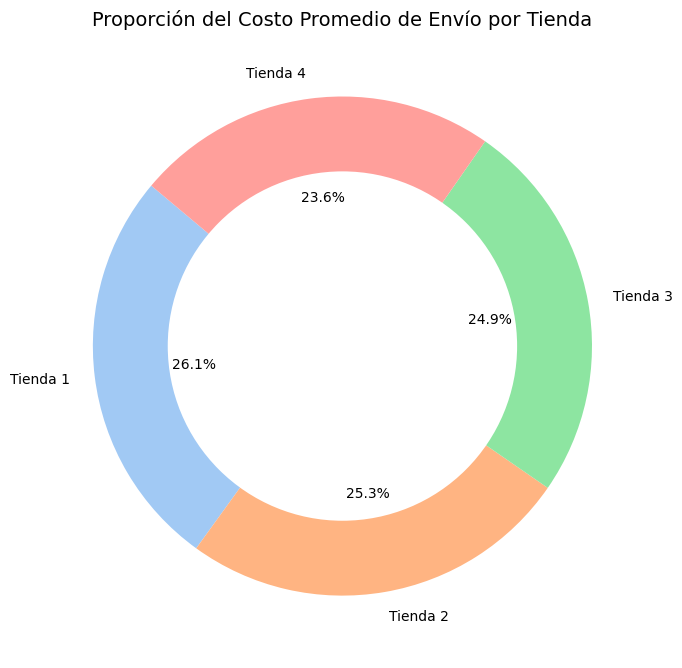

In [ ]:
# Preparar datos
labels = envio_promedio["Tienda"]
valores = envio_promedio["Envío Promedio"]

# Crear gráfico de dona
plt.figure(figsize=(7,7))
colors = sns.color_palette("pastel")

plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Añadir círculo al centro para formar una dona
centro = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centro)

plt.title("Proporción del Costo Promedio de Envío por Tienda", fontsize=14)
plt.tight_layout()
plt.show()


Informe Final – Recomendación de tienda para el Sr. Juan

En este proyecto, el objetivo fue analizar cuál de las cuatro tiendas disponibles sería la mejor opción para que el Sr. Juan empiece a vender sus productos. Para tomar una buena decisión, se tuvieron en cuenta varios factores importantes: los ingresos totales de cada tienda, las categorías más y menos vendidas, qué productos destacan, qué tan satisfechos están los clientes y cuánto cuesta, en promedio, enviar un producto desde cada tienda.

Después de revisar todos estos puntos y generar los gráficos correspondientes, llegamos a una conclusión clara y bien fundamentada. A continuación, te presento el análisis por partes.

1. Ingresos totales por tienda
El primer paso fue revisar cuánto ha facturado cada tienda. Aquí, la Tienda 1 es la que más vende, con más de $1.150 millones en ingresos, lo cual suena muy atractivo. Tienda 2 y Tienda 3 también tienen ingresos bastante altos, mientras que Tienda 4 está un poco más abajo.

    Este dato nos da una idea clara del volumen de ventas y el movimiento comercial en cada tienda.

2. Categorías más vendidas
    Luego, analizamos qué tipo de productos se venden más. Las categorías que más destacan son:

    Electrónicos

    Juguetes

    Muebles

    Esto es importante porque, si el Sr. Juan quiere que sus productos se muevan rápido, lo ideal sería que estén dentro de estas categorías. Por otro lado, hay categorías con menos ventas, como Ropa deportiva o Accesorios, que podrían no ser tan rentables.



3. Calificación promedio por tienda
    Aquí vimos qué tan satisfechos están los clientes con sus compras. La tienda con la mejor calificación fue Tienda 4, lo cual habla muy bien del servicio o la calidad. Sin embargo:

    Tienda 1, a pesar de tener los ingresos más altos, tiene una calificación bastante baja.

    Tienda 3 y Tienda 2 tienen buenas calificaciones, aunque no tan altas como Tienda 4.

    Esto nos dice que vender más no siempre significa tener clientes felices.

4. Productos más y menos vendidos
    También revisamos qué productos se venden más y cuáles no tienen mucha salida. Esto ayuda a entender qué tiene mayor demanda en cada tienda.

    En todas las tiendas hay productos destacados (los más vendidos) y otros que apenas se venden. Este dato es útil para saber si el tipo de producto que ofrece el Sr. Juan encaja con las preferencias de los compradores de una tienda en particular.

5. Costo promedio de envío
    Por último, miramos cuánto cuesta, en promedio, enviar un producto desde cada tienda. En este punto:

    Tienda 2 y Tienda 3 tienen los costos más bajos.

    Tienda 4 tiene un costo de envío bastante más alto, lo cual podría desmotivar a algunos clientes a comprar.

¿Dónde debería vender el Sr. Juan?

Después de revisar todos los factores, mi recomendación es que el Sr. Juan venda sus productos en la Tienda 3. ¿Por qué?

Tiene un muy buen nivel de ingresos, similar al de las tiendas más fuertes.

La calificación de los clientes es positiva, lo que habla de una buena experiencia de compra.

El costo de envío es razonable, lo cual beneficia tanto al vendedor como al cliente.

Y en general, muestra un equilibrio saludable entre ventas, satisfacción del cliente y logística.

Aunque Tienda 1 tiene más ingresos, su calificación baja puede ser una señal de problemas. Y aunque Tienda 4 tiene clientes muy satisfechos, sus ingresos son más bajos y sus envíos más caros.

Por eso, Tienda 3 es la opción más balanceada y segura para que el Sr. Juan empiece a vender con buen pie.

<ipython-input-23-976b9c67a2de>:11: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


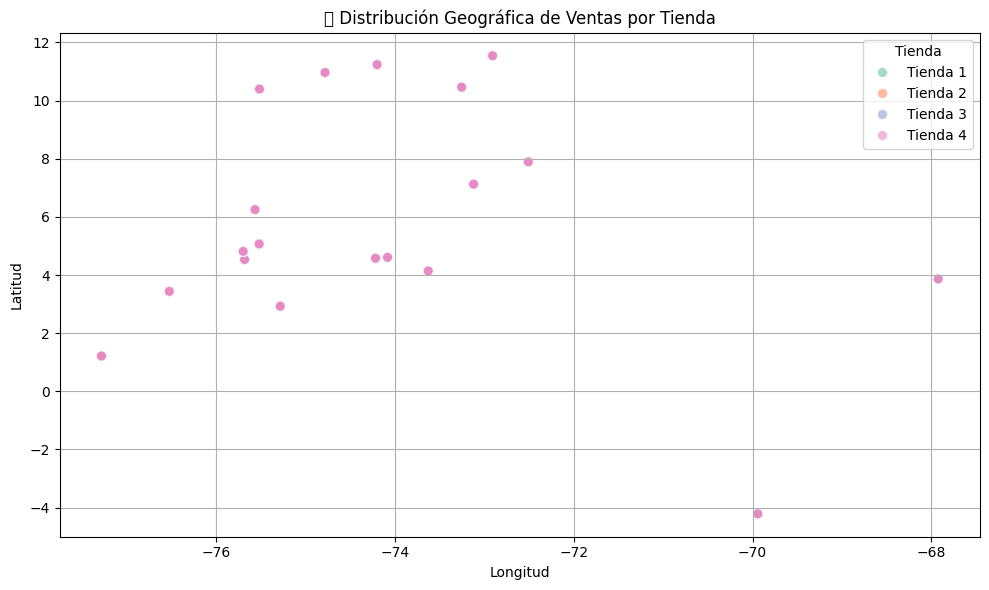

In [ ]:
plt.figure(figsize=(10, 6))

# Usamos colores distintos para cada tienda
sns.scatterplot(data=df, x="lon", y="lat", hue="Tienda", palette="Set2", alpha=0.6, s=50)

plt.title("📍 Distribución Geográfica de Ventas por Tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.legend(title="Tienda", loc='upper right')
plt.tight_layout()
plt.show()
